In [1]:
!pip install pecos

Check timestamp
Check for missing data
Check for corrupt data
Check for data outside expected range
Check for data outside expected range
Check for data outside expected range
Check for stagant data and/or abrupt changes using delta (max-min) within a rolling window
Check for stagant data and/or abrupt changes using delta (max-min) within a rolling window
Check for stagant data and/or abrupt changes using delta (max-min) within a rolling window
Check for data increment outside expected range
Creating graphic for A
Creating graphic for B
Creating graphic for C
Creating graphic for D
Creating graphic for Wave Error C
Writing test results csv file test_results.csv
Writing HTML report
/usr/local/lib/python3.6/dist-packages/pecos/io.py:286: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.




'/content/monitoring_report.html'

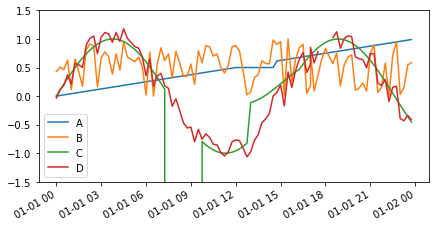

In [8]:
"""
In this example, simple time series data is used to demonstrate basic functions
in pecos.  
* Data is loaded from an excel file which contains four columns of values that 
  are expected to follow linear, random, and sine models.
* A translation dictionary is defined to map and group the raw data into 
  common names for analysis
* A time filter is established to screen out data between 3 AM and 9 PM
* The data is loaded into a pecos PerformanceMonitoring object and a series of 
  quality control tests are run, including range tests and increment tests 
* The results are printed to csv and html reports
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pecos

# Initialize logger
pecos.logger.initialize()

# Create a Pecos PerformanceMonitoring data object
pm = pecos.monitoring.PerformanceMonitoring()

# Populate the object with a DataFrame and translation dictionary
data_file = 'https://github.com/sandialabs/pecos/raw/master/examples/simple/simple.xlsx'
df = pd.read_excel(data_file, index_col=0)
pm.add_dataframe(df)
pm.add_translation_dictionary({'Wave': ['C','D']}) # group C and D

# Check the expected frequency of the timestamp
pm.check_timestamp(900)
 
# Generate a time filter to exclude data points early and late in the day
clock_time = pecos.utils.datetime_to_clocktime(pm.df.index)
time_filter = pd.Series((clock_time > 3*3600) & (clock_time < 21*3600), 
                        index=pm.df.index)
pm.add_time_filter(time_filter)

# Check for missing data
pm.check_missing()
        
# Check for corrupt data values
pm.check_corrupt([-999]) 

# Add a composite signal which compares measurements to a model
wave_model = np.array(np.sin(10*clock_time/86400))
wave_measurments = pm.df[pm.trans['Wave']]
wave_error = np.abs(wave_measurments.subtract(wave_model,axis=0))
wave_error.columns=['Wave Error C', 'Wave Error D']
pm.add_dataframe(wave_error)
pm.add_translation_dictionary({'Wave Error': ['Wave Error C', 'Wave Error D']})

# Check data for expected ranges
pm.check_range([0, 1], 'B')
pm.check_range([-1, 1], 'Wave')
pm.check_range([None, 0.25], 'Wave Error')

# Check for stagnant data within a 1 hour moving window
pm.check_delta([0.0001, None], 'A', 3600) 
pm.check_delta([0.0001, None], 'B', 3600) 
pm.check_delta([0.0001, None], 'Wave', 3600) 
    
# Check for abrupt changes between consecutive time steps
pm.check_increment([None, 0.6], 'Wave') 

# Compute the quality control index for A, B, C, and D
mask = pm.mask[['A','B','C','D']]
QCI = pecos.metrics.qci(mask, pm.tfilter)

# Generate graphics
test_results_graphics = pecos.graphics.plot_test_results(pm.df, pm.test_results)
df.plot(ylim=[-1.5,1.5], figsize=(7.0,3.5))
plt.savefig('custom.png', format='png', dpi=500)

# Write test results and report files
pecos.io.write_test_results(pm.test_results)
pecos.io.write_monitoring_report(pm.df, pm.test_results, test_results_graphics, 
                                 ['custom.png'], QCI)

In [9]:
pm.test_results

,Variable Name,Start Time,End Time,Timesteps,Error Flag
1,,2015-01-01 05:00:00,2015-01-01 05:00:00,1,Missing timestamp
2,,2015-01-01 17:00:00,2015-01-01 17:00:00,1,Duplicate timestamp
3,,2015-01-01 19:30:00,2015-01-01 19:30:00,1,Nonmonotonic timestamp
4,A,2015-01-01 12:00:00,2015-01-01 14:30:00,11,"Delta < lower bound, 0.0001"
5,B,2015-01-01 06:30:00,2015-01-01 06:30:00,1,"Data < lower bound, 0"
6,B,2015-01-01 15:30:00,2015-01-01 15:30:00,1,"Data > upper bound, 1"
7,C,2015-01-01 07:30:00,2015-01-01 09:30:00,9,Corrupt data
8,C,2015-01-01 13:00:00,2015-01-01 13:00:00,1,"|Increment| > upper bound, 0.6"
9,D,2015-01-01 03:15:00,2015-01-01 03:30:00,2,"Data > upper bound, 1"
10,D,2015-01-01 04:00:00,2015-01-01 04:00:00,1,"Data > upper bound, 1"


In [23]:
import IPython
IPython.display.HTML(filename='/content/monitoring_report.html')

In [24]:
%cd /content/

/content


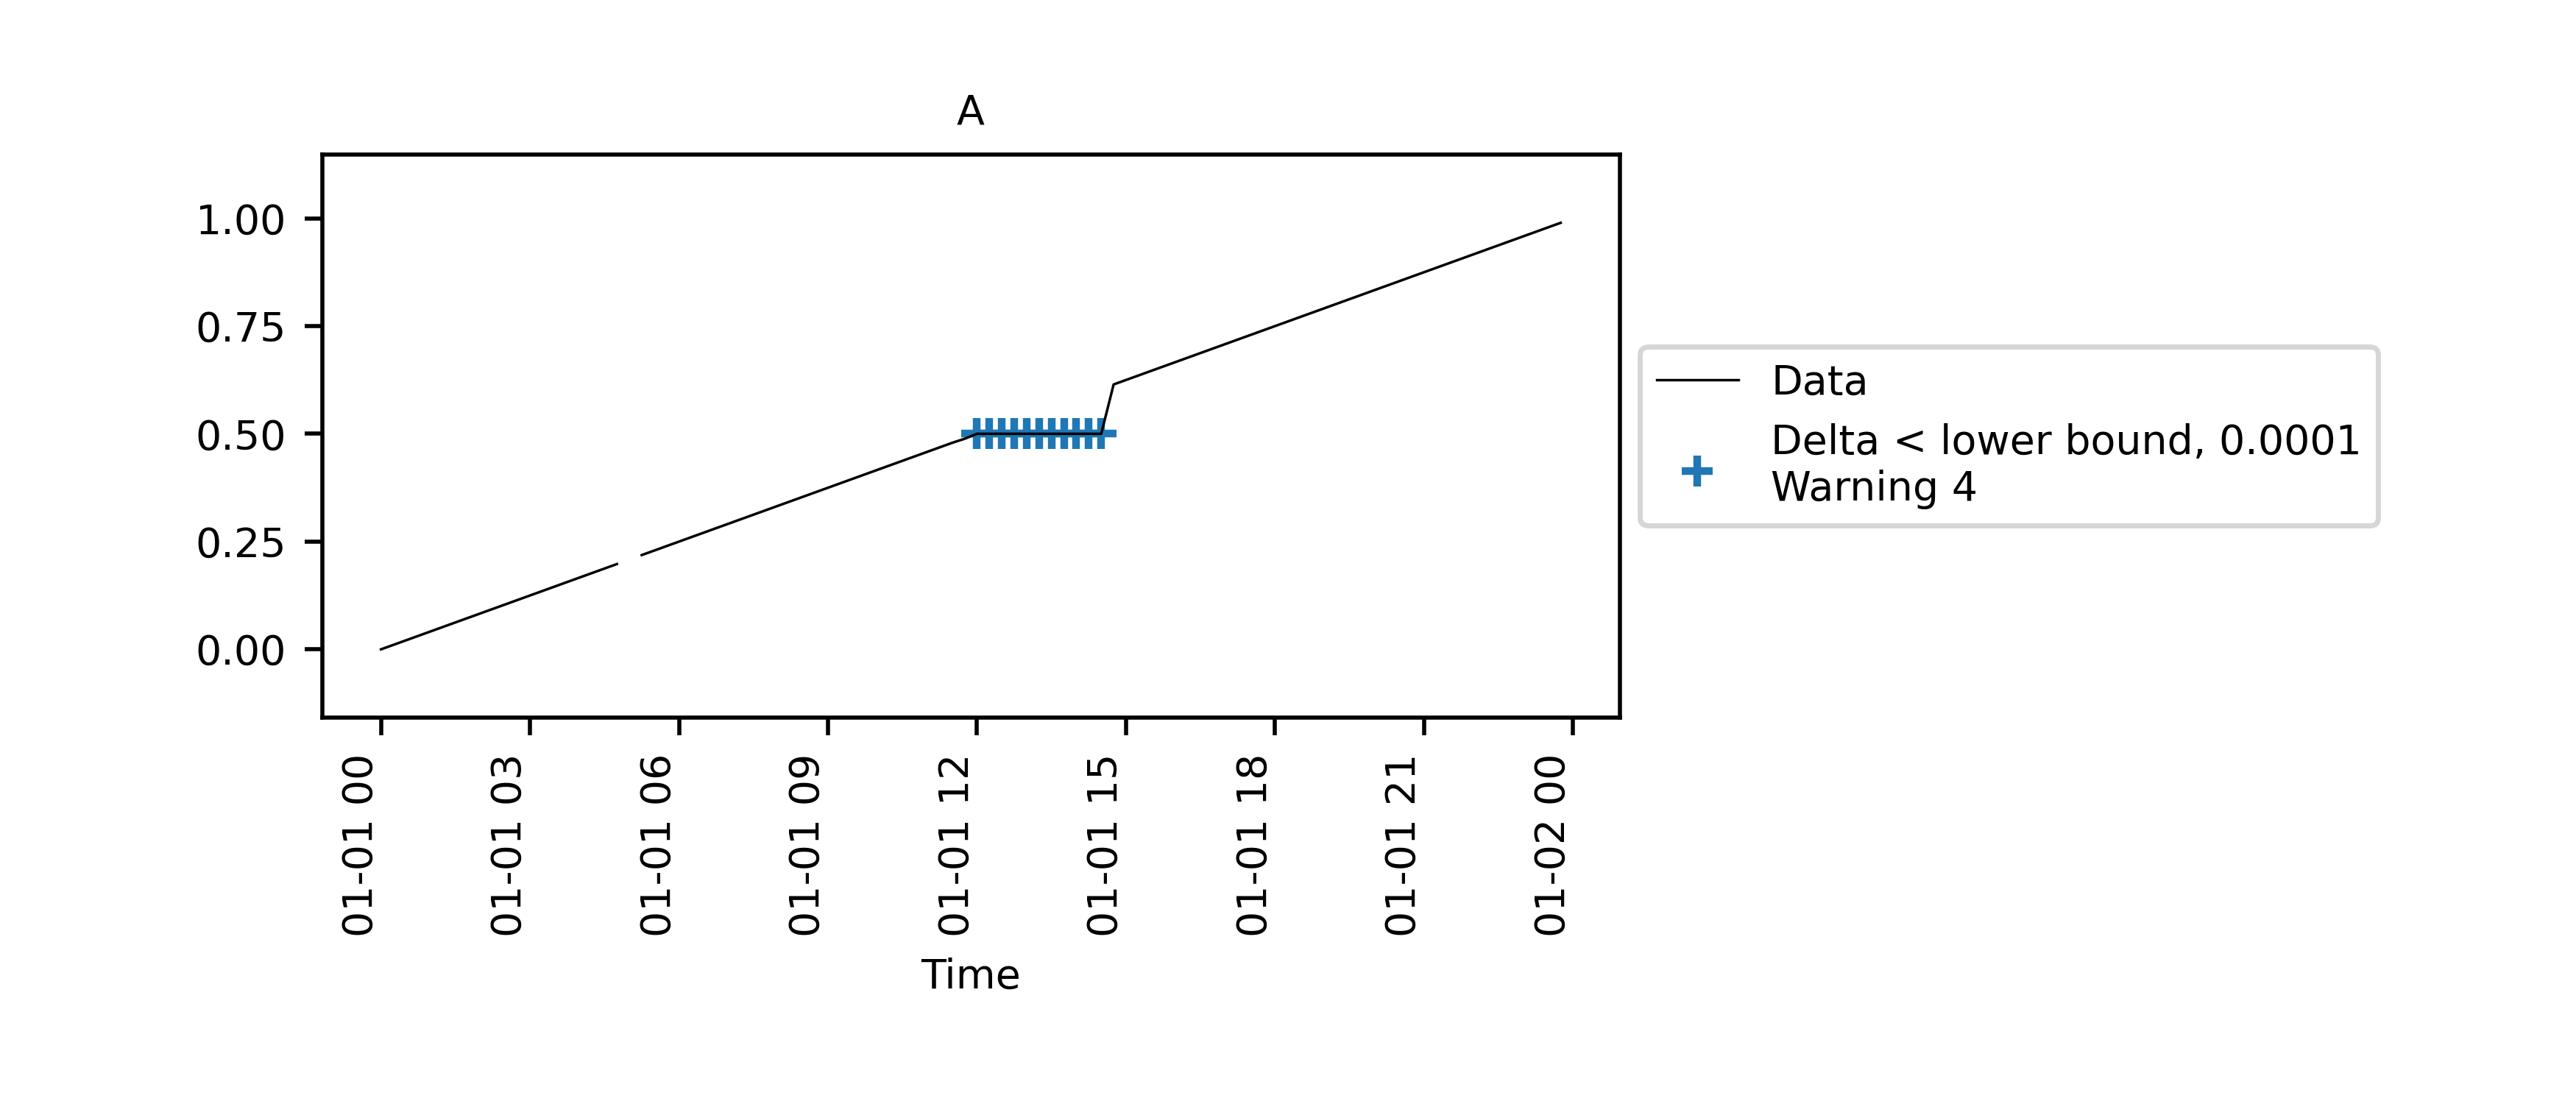

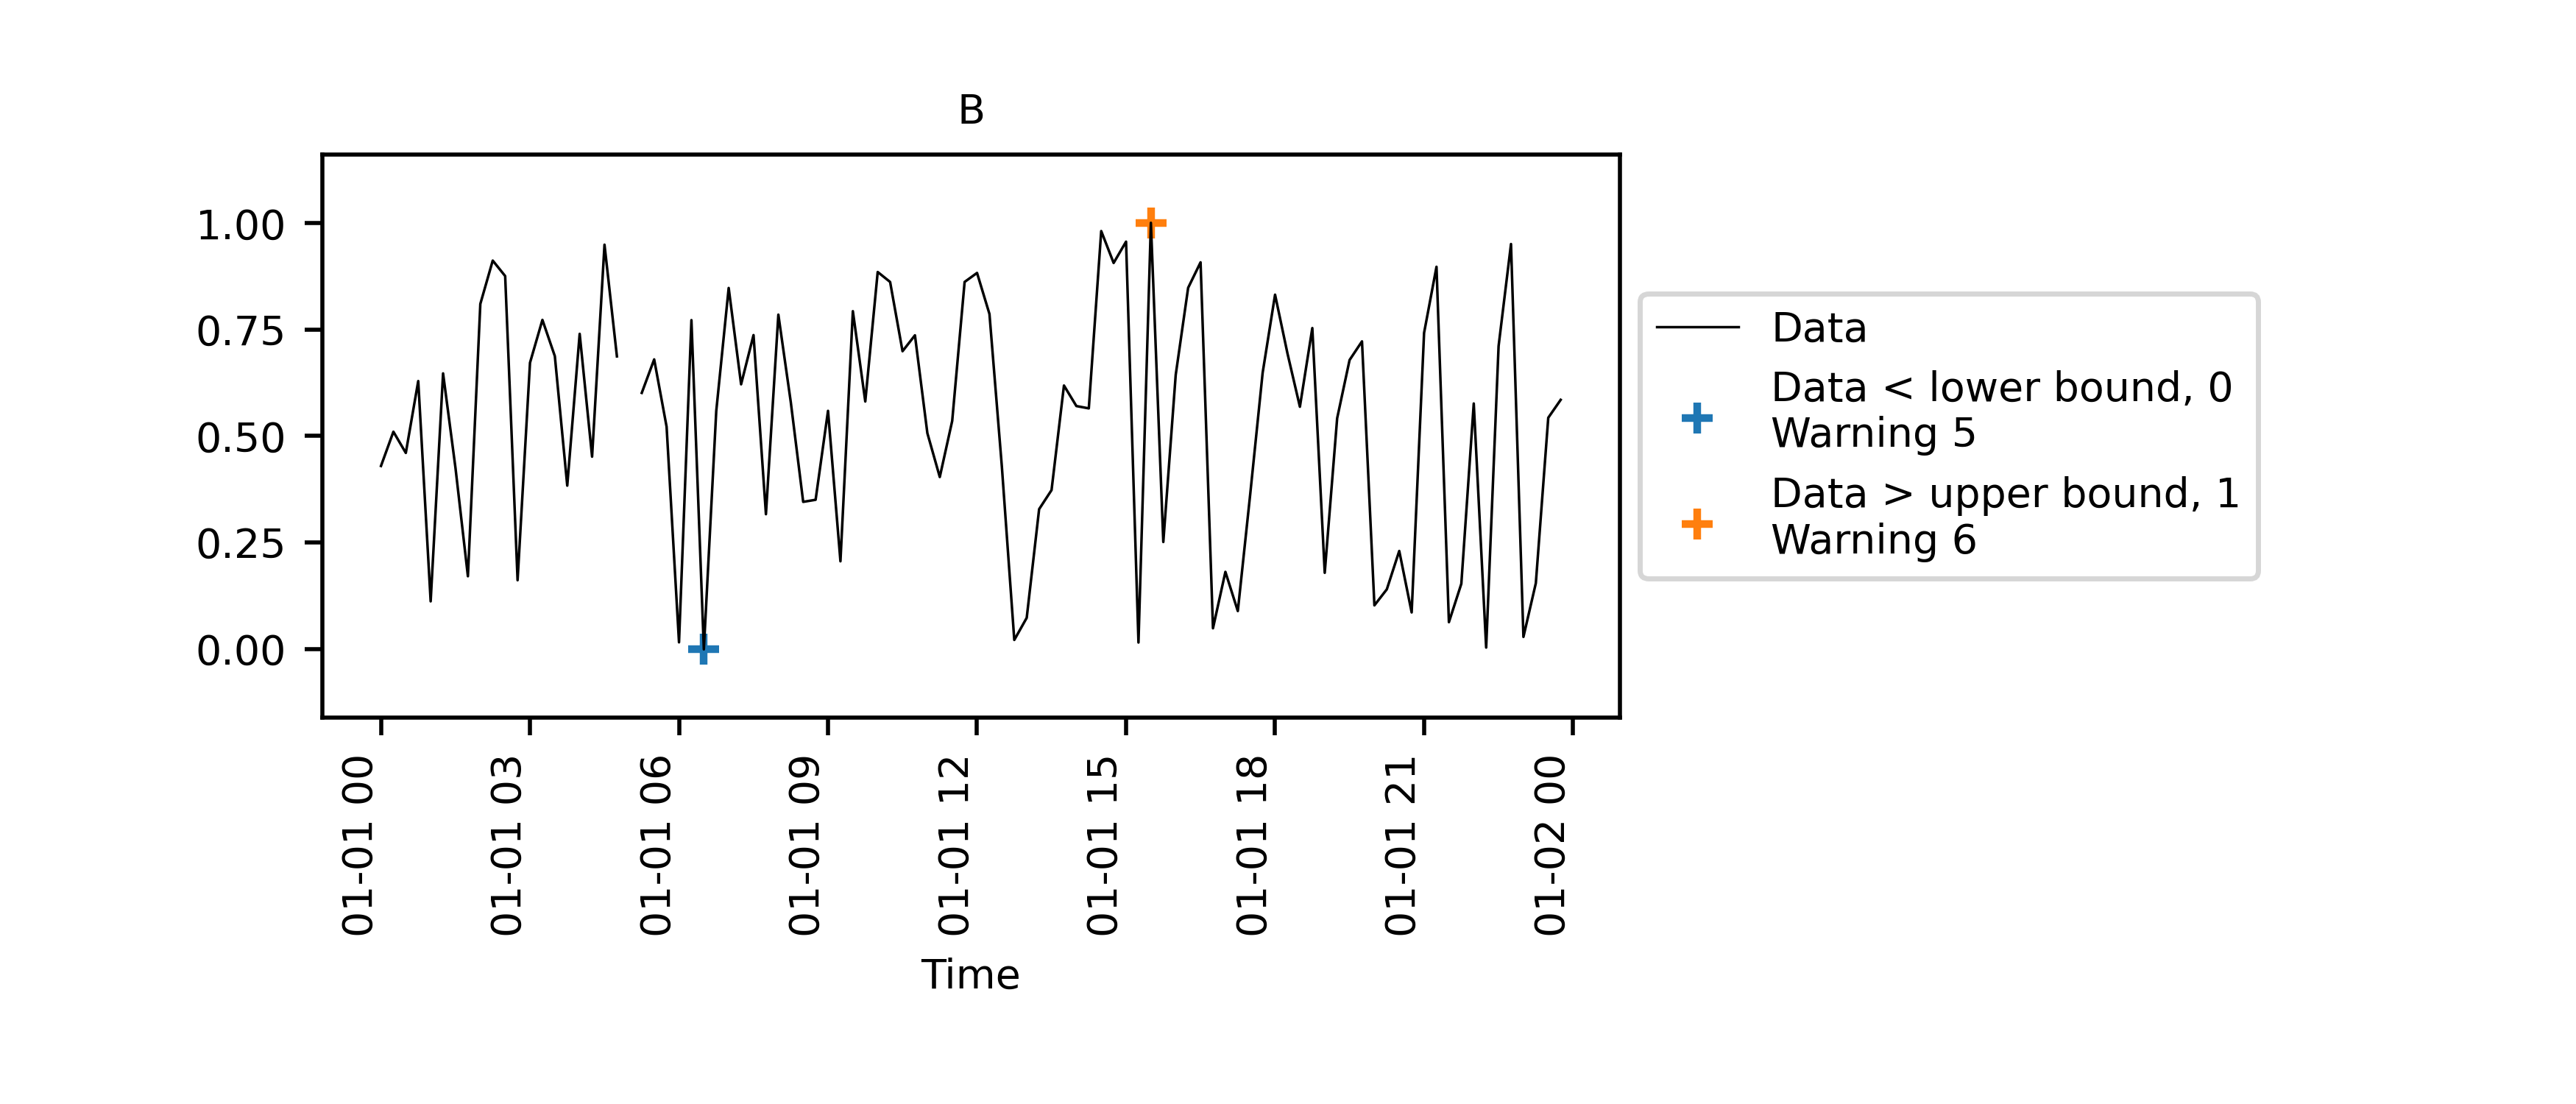

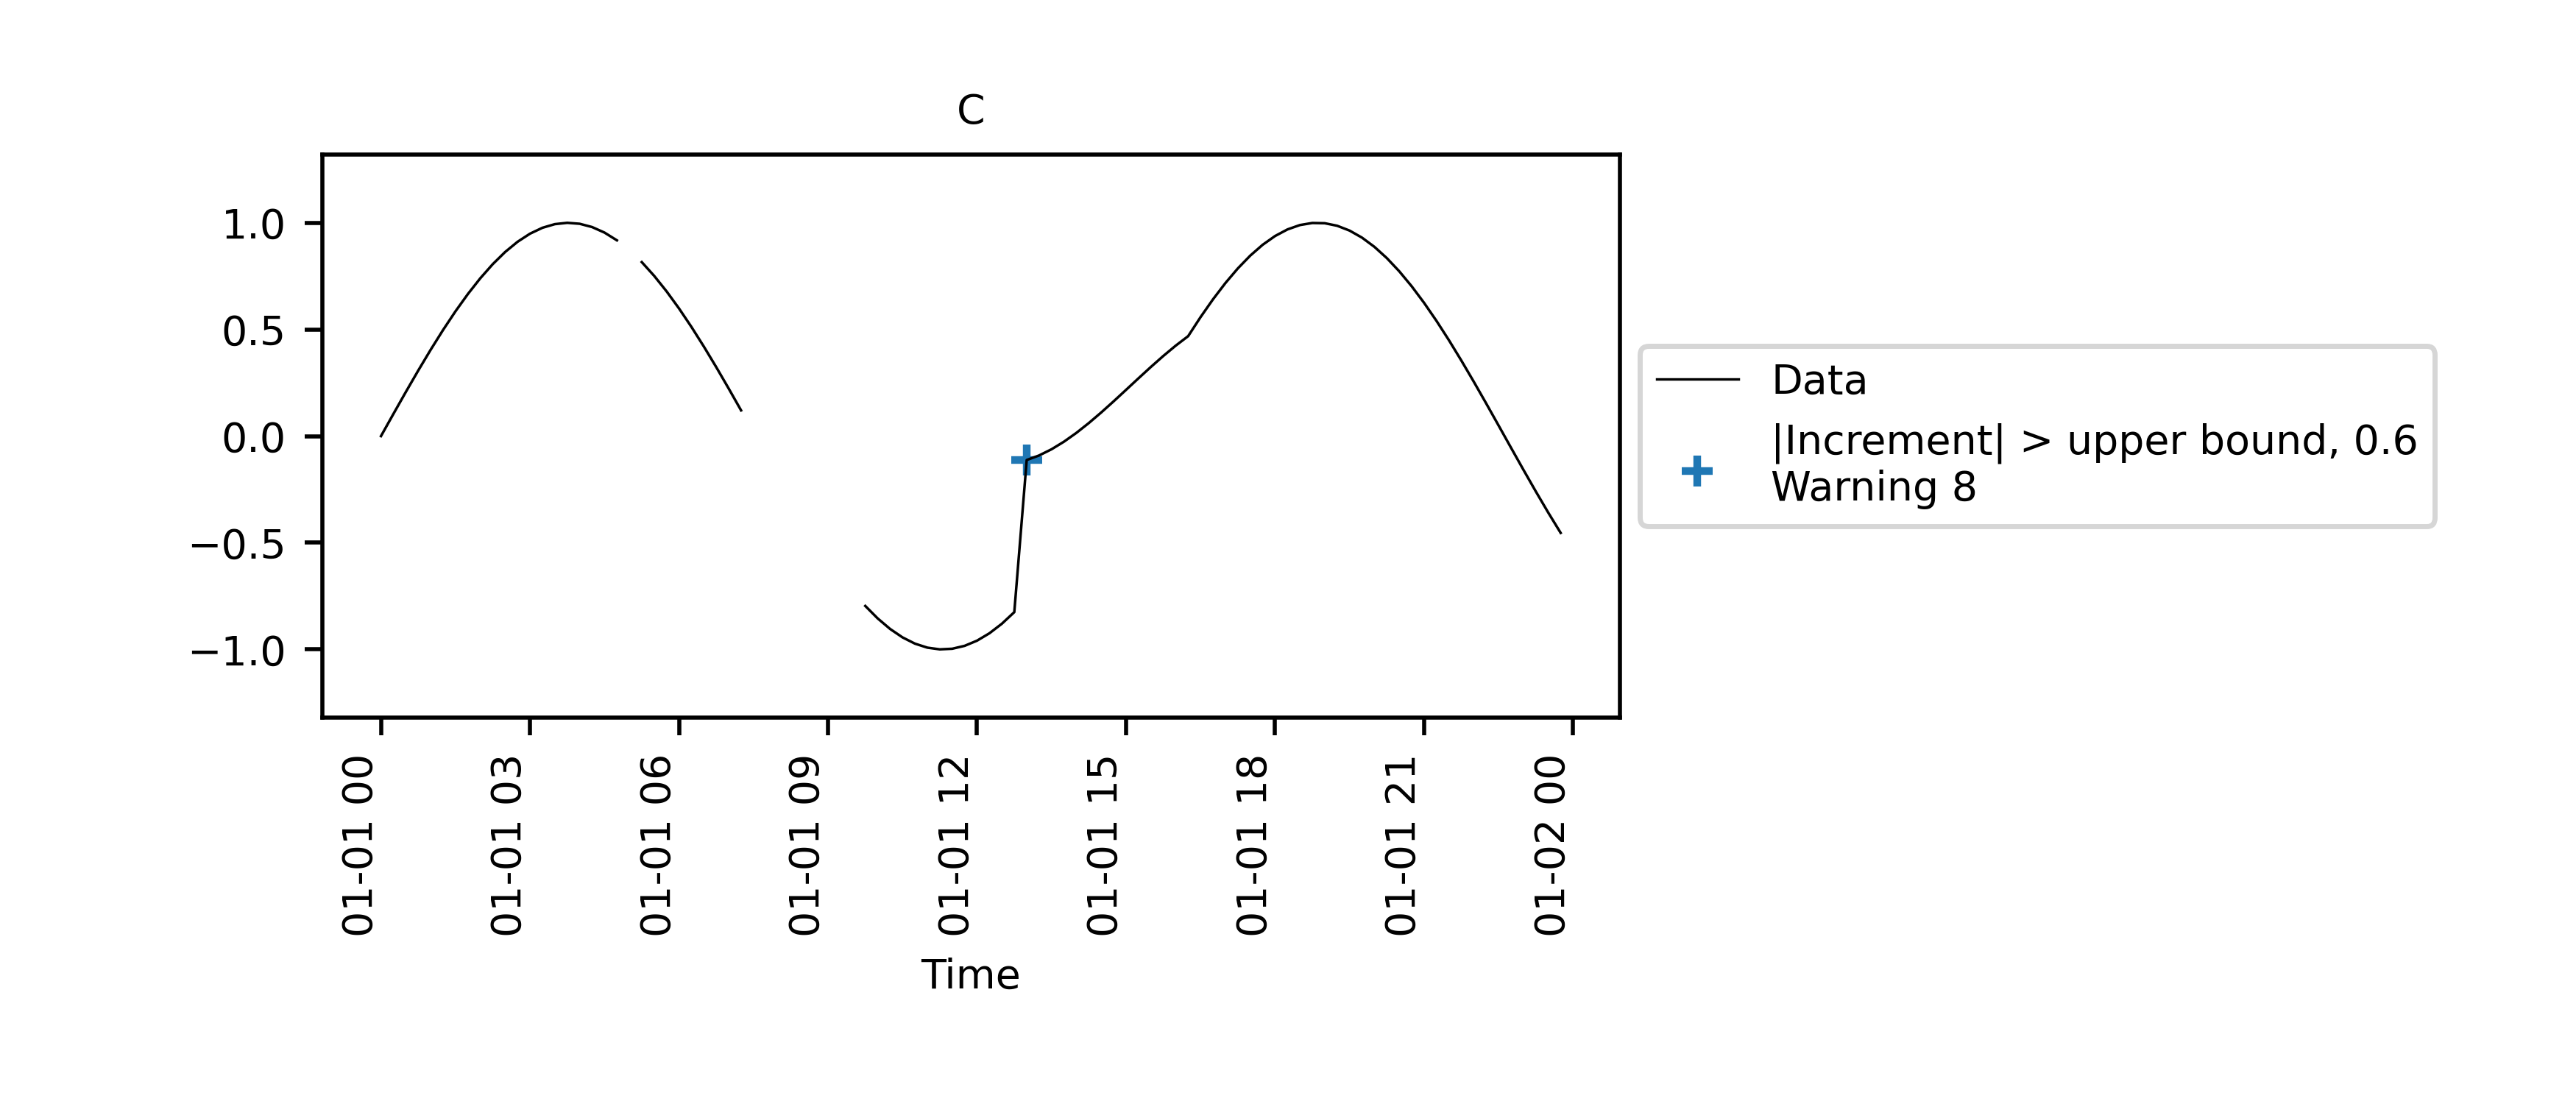

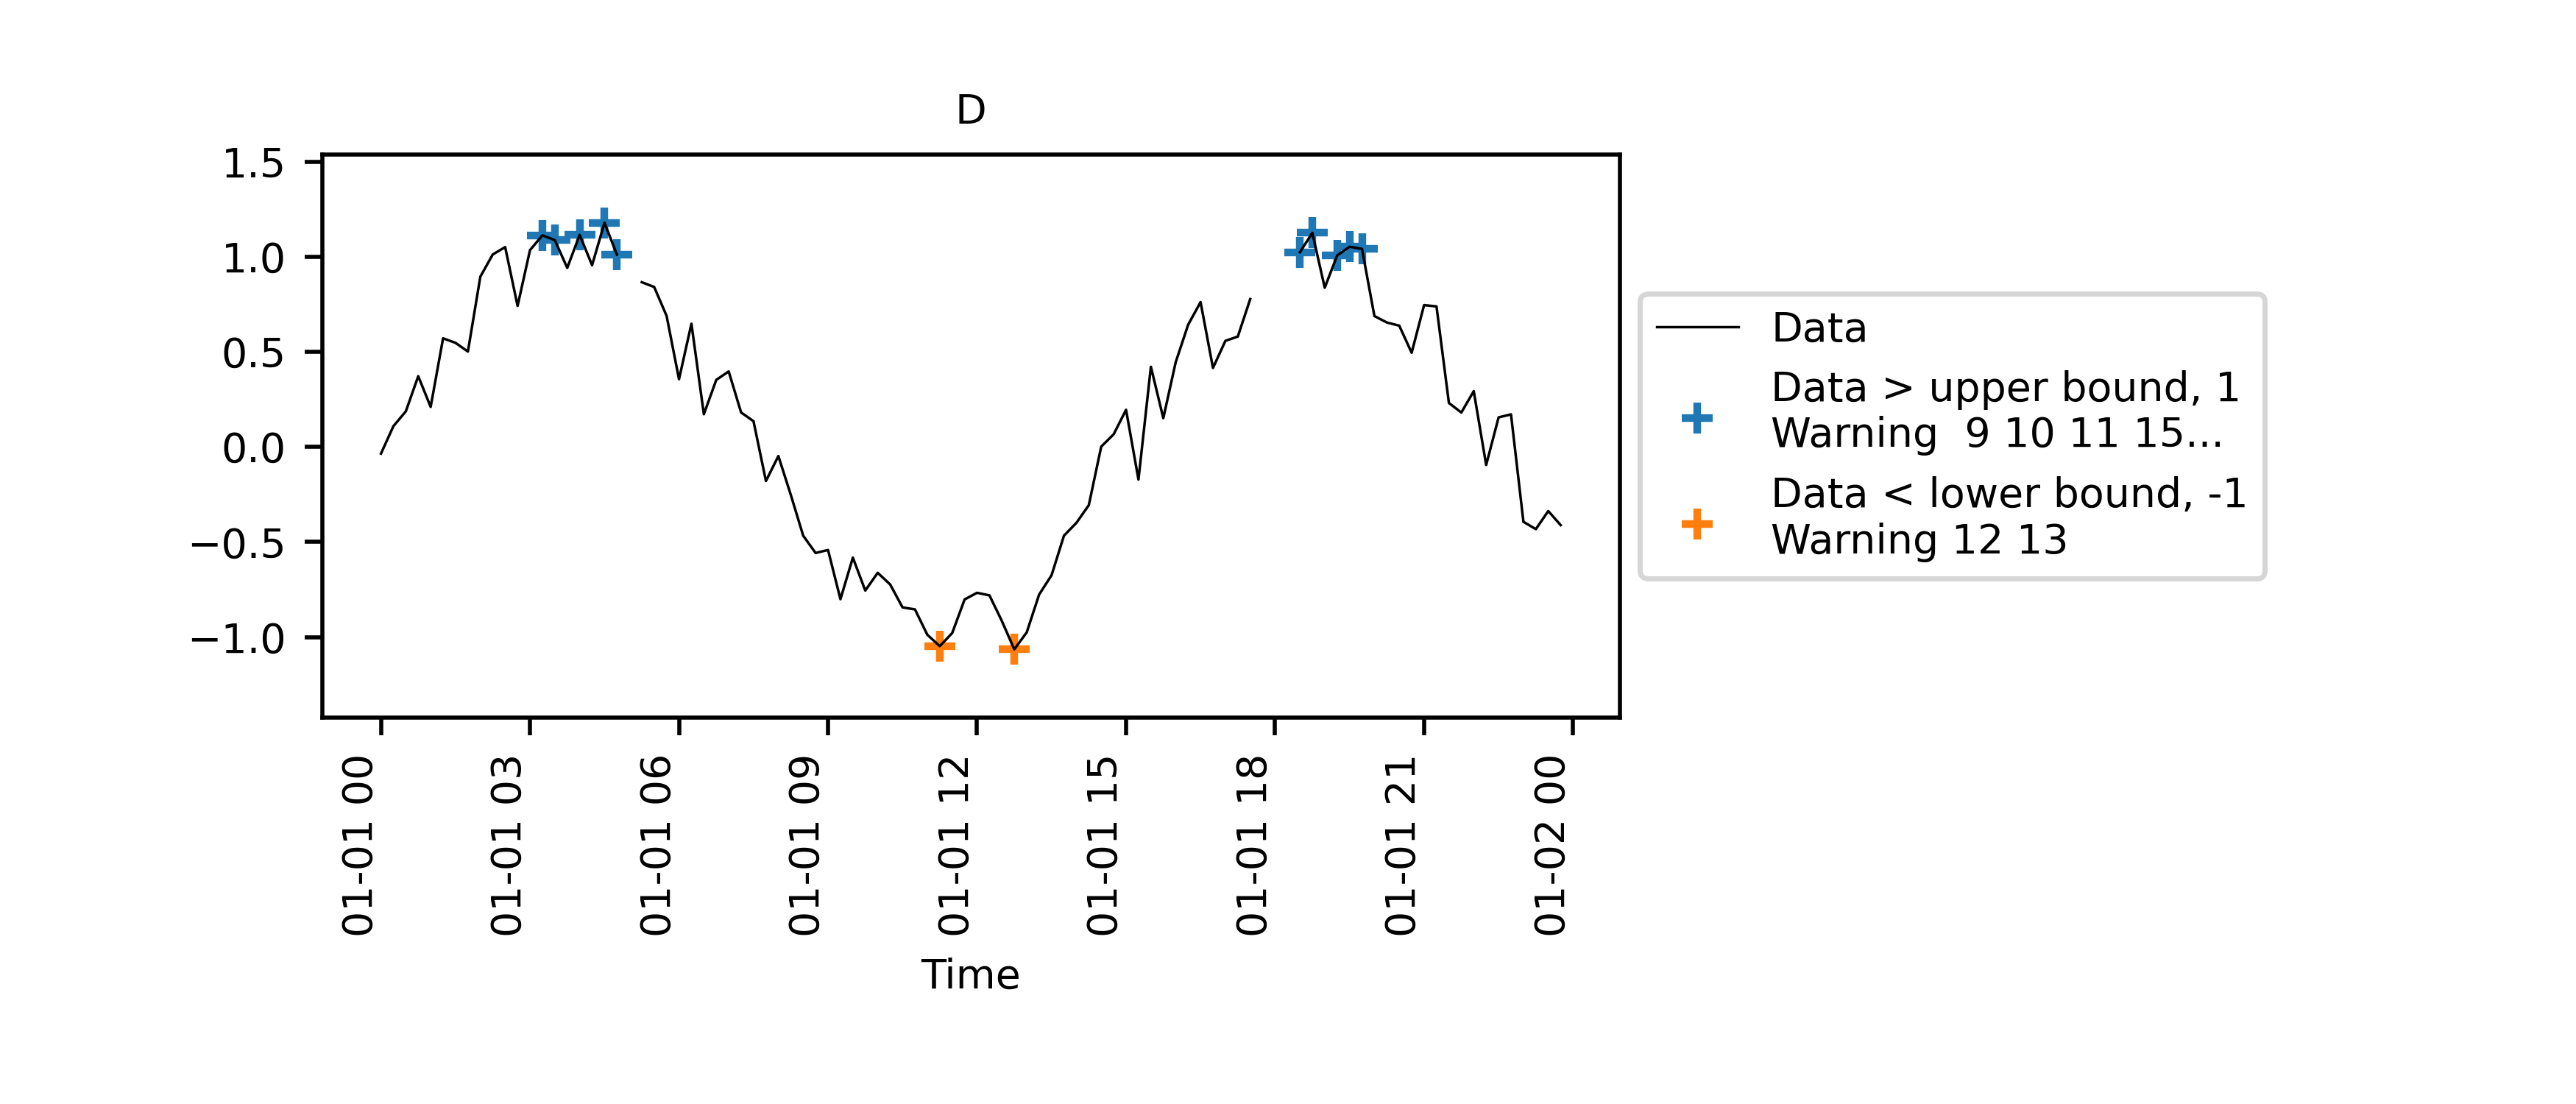

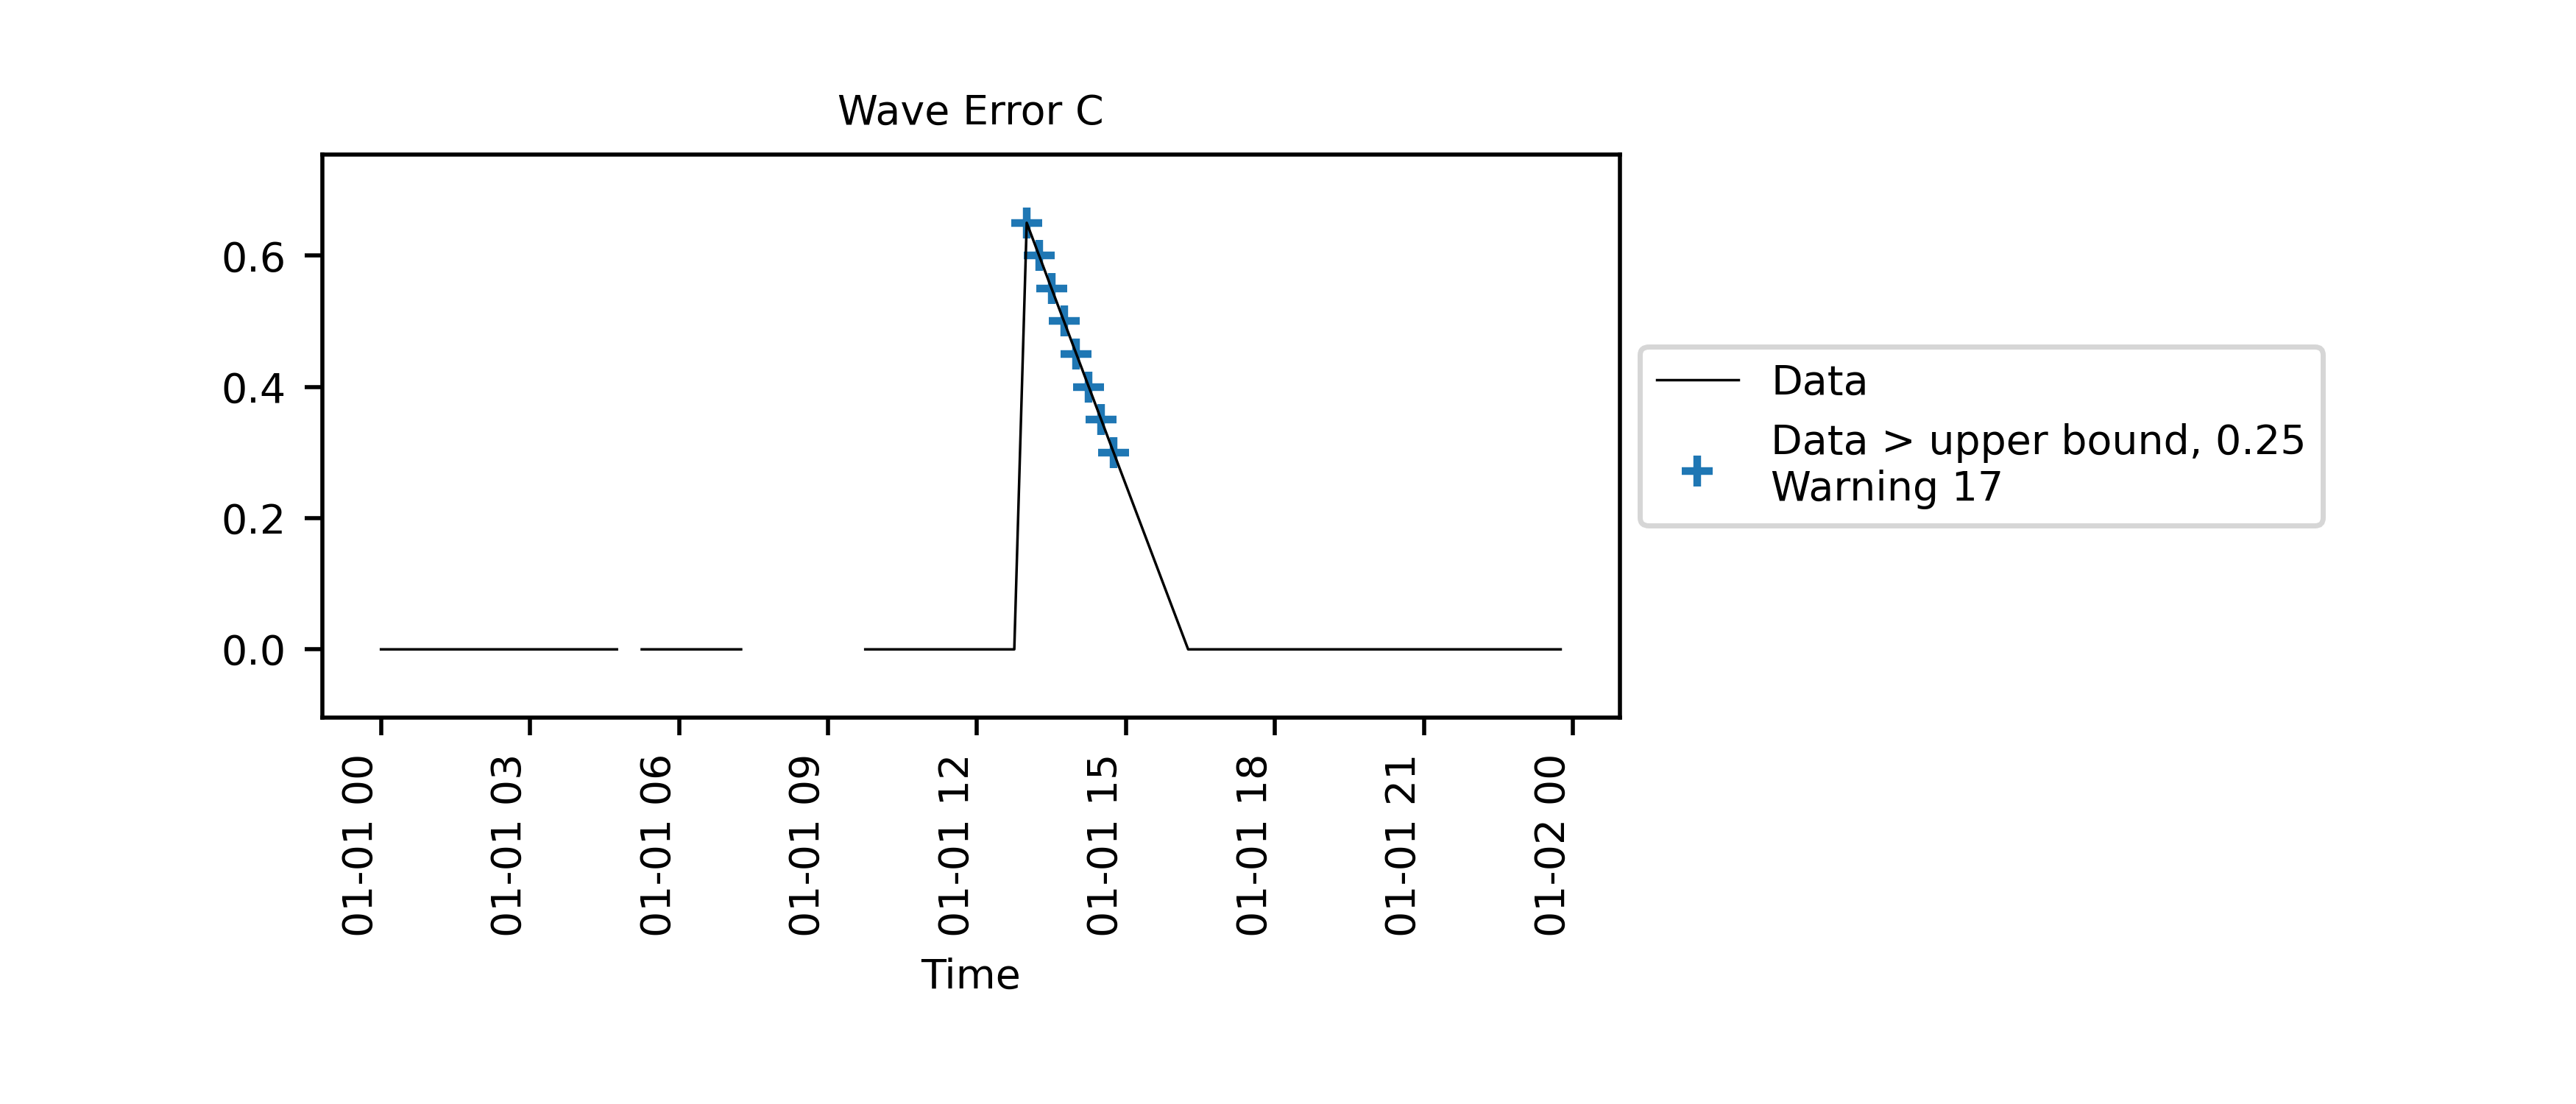

In [25]:
from IPython.display import Image, display
display(Image('test_results0.png', width=600, height=300))
display(Image('test_results1.png', width=600, height=300)) 
display(Image('test_results2.png', width=600, height=300))
display(Image('test_results3.png', width=600, height=300)) 
display(Image('test_results4.png', width=600, height=300))
